알고리즘에 대한 데이터가 충분하지 않으면 좋은 결과를 낼 수 없다.
이런 문제를 해결하고자 k-fold cross validation(k겹 교차 검증)을 이용해 데이터의 불충분함을 보완한다.

데이터셋을 여러 개로 나누어 하나씩 테스트셋으로 사용하고 나머지를 모두 학습셋으로 사용하는 방법이다.

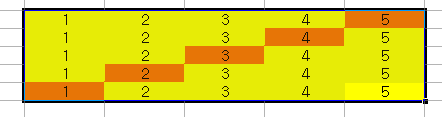

이런식으로.

sklearn.model_selection.StratifiedKFold를 이용하면 k겹 교차 검증을 이용할 수 있다.
레퍼런스는 아래 링크를 참고하자.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

```
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
```
n_split은 데이터셋을 나누는 회수
shuffle은 데이터셋을 나누기 전에 섞을지 말지를 결정한다.
random_state에 일정한 seed를 주면 일정한 shuffle이 나온다.

실행 예시를 보자
```
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)

print(skf)
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
# X와 y를 trainset, testset으로 나눈다.
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
```
출력 :
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]

In [4]:
# 데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'sonar.csv'

!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy

from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# 데이터 적용
df = pd.read_csv(my_data, header=None)

dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# accuracy를 리스트로 선언해서 여러 fold에 대하여 accuracy를 모은다.
accuracy = []

# 모델의 설정, 컴파일, 실행
# 각각의 fold에 대하여 100회 씩 학습을 진행한다.
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    # accuracy를 리스트로 선언해서 여러 fold에 대하여 accuracy를 모은다.
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)


Saving sonar.csv to sonar.csv
     |████████████████████████████████| 411.5MB 28kB/s 
     |████████████████████████████████| 512kB 33.6MB/s 
     |████████████████████████████████| 3.8MB 32.7MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
TensorFlow 1.x selected.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.



Epoch 1/100
187/187 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.5348
Epoch 2/100
187/187 [==============================] - 0s 286us/step - loss: 0.2279 - accuracy: 0.7326
Epoch 3/100
187/187 [==============================] - 0s 257us/step - loss: 0.2171 - accuracy: 0.6684
Epoch 4/100
187/187 [==============================] - 0s 322us/step - loss: 0.1971 - accuracy: 0.7326
Epoch 5/100
187/187 [==============================] - 0s 261us/step - loss: 0.1884 - accuracy: 0.7701
Epoch 6/100
187/187 [==============================] - 0s 323us/step - loss: 0.1748 - accuracy: 0.8021
Epoch 7/100
187/187 [==============================] - 0s 285us/step - loss: 0.1665 - accuracy: 0.8289
Epoch 8/100
187/187 [==============================] - 0s 276us/step - loss: 0.1578 - accuracy: 0.7914
Epoch 9/100
187/187 [==============================] - 0s 347us/step - loss: 0.1498 - accuracy: 0.8128
Epoch 10/100
187/187 [==============================] - 0s 321us/step - lo